# Project Introduction: Cholesterol Levels and Cardiovascular Disease

This research investigates the relationship between cholesterol levels and the presence of cardiovascular disease (CVD), aiming to assess whether cholesterol is significantly associated with CVD status. Given cholesterol's critical role as a potential risk factor in cardiovascular health, identifying statistically significant differences between individuals with and without CVD may yield important insights for clinical screening and preventive care. The study begins with thorough data cleaning and preparation, including handling missing values and clearly labeling categorical variables. The dataset is then stratified by CVD status.

Exploratory Data Analysis (EDA) is performed to examine patterns in cholesterol, age, and sex across both groups. Inferential statistical methods are applied to formally test the relationship between cholesterol levels and CVD presence, with an emphasis on the Chi-Square test of independence to evaluate the association. Additional analyses include logistic regression to model the probability of CVD based on cholesterol, age, and sex etc. The findings aim to contribute to public health strategies and highlight the importance of cholesterol management in reducing cardiovascular risk.

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the dataset
data = pd.read_csv('/kaggle/input/cardiovascular-disease/cardio_data_processed.csv')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1,Hypertension Stage 1
68201,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2,Hypertension Stage 2
68202,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2,Hypertension Stage 2
68203,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1,Hypertension Stage 1


**1. DATA CLEANING AND PREPARATION**

In [3]:
#Display the columns in the dataset
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

In [4]:
#Checking for duplicates using the unique 'id' column
duplicate_cols = data.duplicated(subset=['id'], keep=False)
#Count total duplicates in id column
duplicate_rows = data['id'].duplicated().sum()
duplicate_rows


0

In [5]:
#Checking for missing values across columns
missing_vals = data.isnull().sum()
missing_vals

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

In [6]:
#Remove unnecessary columns from the dataframe and keep a clean copy of the dataframe
#For this analysis I dont need ID, bp_category_encoded, and gluc columns
unnecessary_cols = ['age','id', 'gluc','bp_category_encoded']
data1 = data.drop(unnecessary_cols, axis=1)
data1

,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,0,0,0,0,47,23.011177,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,2,168,76.0,120,80,1,1,0,1,0,52,26.927438,Hypertension Stage 1
68201,1,158,126.0,140,90,2,0,0,1,1,61,50.472681,Hypertension Stage 2
68202,2,183,105.0,180,90,3,0,1,0,1,52,31.353579,Hypertension Stage 2
68203,1,163,72.0,135,80,1,0,0,0,1,61,27.099251,Hypertension Stage 1


In [7]:
#Checking data types of columns
data1.dtypes


gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
smoke            int64
alco             int64
active           int64
cardio           int64
age_years        int64
bmi            float64
bp_category     object
dtype: object

In [8]:
#Change the data types of some columns to standard data type
data1['gender'] = data['gender'].astype('category')
data1['cholesterol'] = data['cholesterol'].astype('category')
data1['cardio'] = data['cardio'].astype('category')
#Convert categorical variables into meaningful labels by mapping
mapping_dict = {
    'gender':{2:'Male',1:'Female'},
    'cholesterol':{1:'Normal',2:'Above Normal',3:'Well Above Normal'},
    'cardio':{0:'No Disease',1:'Disease present'}
}

for col, mapping in mapping_dict.items():
    data1[col] = data1[col].map(mapping)

data1

,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco,active,cardio,age_years,bmi,bp_category
0,Male,168,62.0,110,80,Normal,0,0,1,No Disease,50,21.967120,Hypertension Stage 1
1,Female,156,85.0,140,90,Well Above Normal,0,0,1,Disease present,55,34.927679,Hypertension Stage 2
2,Female,165,64.0,130,70,Well Above Normal,0,0,0,Disease present,51,23.507805,Hypertension Stage 1
3,Male,169,82.0,150,100,Normal,0,0,1,Disease present,48,28.710479,Hypertension Stage 2
4,Female,156,56.0,100,60,Normal,0,0,0,No Disease,47,23.011177,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,Male,168,76.0,120,80,Normal,1,0,1,No Disease,52,26.927438,Hypertension Stage 1
68201,Female,158,126.0,140,90,Above Normal,0,0,1,Disease present,61,50.472681,Hypertension Stage 2
68202,Male,183,105.0,180,90,Well Above Normal,0,1,0,Disease present,52,31.353579,Hypertension Stage 2
68203,Female,163,72.0,135,80,Normal,0,0,0,Disease present,61,27.099251,Hypertension Stage 1


In [9]:
#Grouping patients into those with cardiovascular disease and those without
With_cardiovascular = data1.loc[(data1.cardio == 'Disease present')]
Without_cardiovascular = data1.loc[(data1.cardio == 'No Disease')]

print(With_cardiovascular.head())
print(Without_cardiovascular.head())

    gender  height  weight  ap_hi  ap_lo        cholesterol  smoke  alco  \
1   Female     156    85.0    140     90  Well Above Normal      0     0   
2   Female     165    64.0    130     70  Well Above Normal      0     0   
3     Male     169    82.0    150    100             Normal      0     0   
7     Male     178    95.0    130     90  Well Above Normal      0     0   
15    Male     172   112.0    120     80             Normal      0     0   

    active           cardio  age_years        bmi           bp_category  
1        1  Disease present         55  34.927679  Hypertension Stage 2  
2        0  Disease present         51  23.507805  Hypertension Stage 1  
3        1  Disease present         48  28.710479  Hypertension Stage 2  
7        1  Disease present         61  29.983588  Hypertension Stage 1  
15       0  Disease present         45  37.858302  Hypertension Stage 1  
   gender  height  weight  ap_hi  ap_lo        cholesterol  smoke  alco  \
0    Male     168    62.

**2. Exploratory Data Analysis (EDA)**

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0, 0.5, 'Cholesterol levels counts')

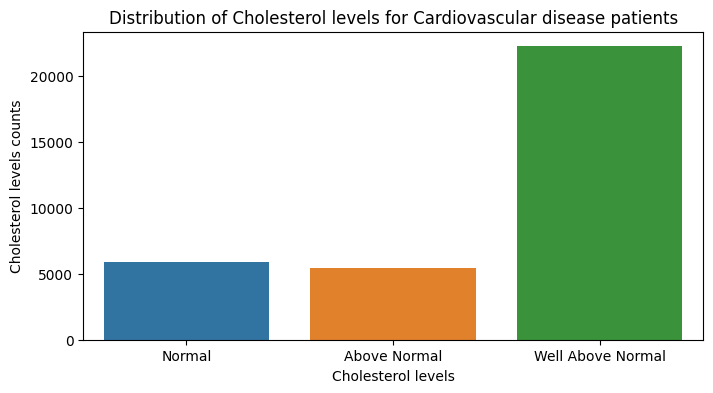

In [10]:
#Visualising cholesterol distribution of the two groups
#Cardiovascular disease patients
Cardio_Cholesterol_levels = With_cardiovascular['cholesterol'].unique()
counts_of_cholesterol_levels = With_cardiovascular['cholesterol'].value_counts()

#plot
plt.figure(figsize=(8,4))
plt.title('Distribution of Cholesterol levels for Cardiovascular disease patients')
sns.barplot(x=Cardio_Cholesterol_levels, y=counts_of_cholesterol_levels.values)
plt.xlabel('Cholesterol levels')
plt.ylabel('Cholesterol levels counts')

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0, 0.5, 'Cholesterol levels counts')

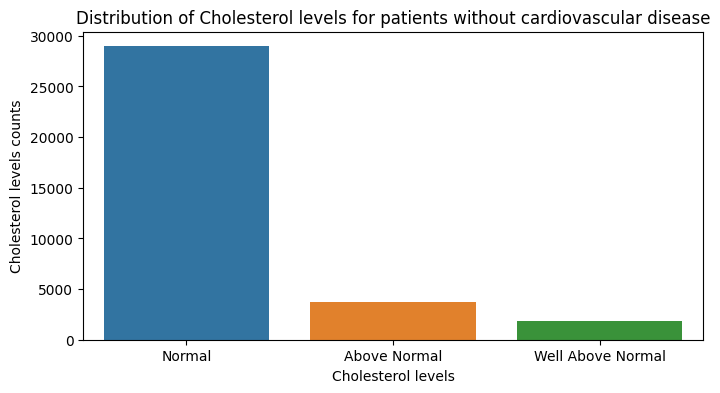

In [11]:
#Visualising cholesterol distribution of the two groups
#Patients without cardiovascular disease
Cardio_Cholesterol_levels = Without_cardiovascular['cholesterol'].unique()
counts_of_cholesterol_levels = Without_cardiovascular['cholesterol'].value_counts()

#plot
plt.figure(figsize=(8,4))
plt.title('Distribution of Cholesterol levels for patients without cardiovascular disease')
sns.barplot(x=Cardio_Cholesterol_levels, y=counts_of_cholesterol_levels.values)
plt.xlabel('Cholesterol levels')
plt.ylabel('Cholesterol levels counts')

Patients with Cardiovascular disease(s) have high cholesterol levels which is well above normal while patients without cardiovascular disease(s) have normal cholesterol levels.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

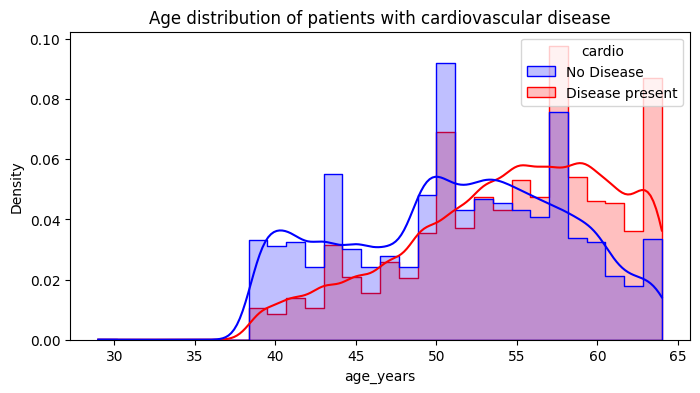

In [12]:
#Examining age distribution by cardiovascular disease status
#plot
plt.figure(figsize=(8,4))
plt.title('Age distribution of patients with cardiovascular disease')
sns.histplot(data=data1, x='age_years', hue='cardio', bins=30,kde=True,element='step', stat='density', common_norm=False,  palette={'No Disease': 'blue', 'Disease present': 'red'})
plt.show()

**Interpretation of Results:**
**1. General Shape and Spread:**

The age range for both groups spans from about 38 to 65 years.

Both groups peak between 50 and 60 years, but the patterns differ.

**2. No Disease Group (Blue):**
Has a slightly wider and flatter distribution.

Shows peaks around 42–45, 50, and 55–60.

Overall, more evenly spread across the age range.

**3. Disease Present Group (Red):**

Distribution is more concentrated between 50–60+ years.

Clear peak around 58–60 years, and less density under age 45.

Suggests that CVD is more common among older individuals.

**Conclusion:**

Older age is associated with a higher presence of cardiovascular disease.

The red KDE curve (CVD present) shifts right, indicating CVD is more prevalent in older age brackets.

This supports common medical understanding: age is a significant risk factor for cardiovascular disease.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


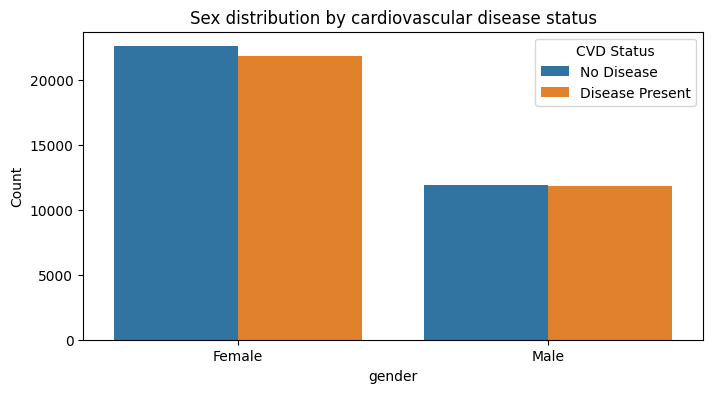

In [13]:
#Sex distribution by cardiovascular disease status
plt.figure(figsize=(8,4))
plt.title('Sex distribution by cardiovascular disease status')
sns.countplot(data=data1, x='gender', hue='cardio')
plt.legend(title='CVD Status', labels=['No Disease', 'Disease Present'])
plt.ylabel('Count')
plt.show()

**Key Observations:**

**1. Female Group:**

The number of females with No Disease (blue) is slightly higher than those with CVD (orange).

But the counts are very close, suggesting CVD affects a large number of females.

**2. Male Group:**

Male counts are lower overall compared to females.

The number of males with CVD and without CVD is nearly identical.

**3. General Sex Difference:**

More females than males are in the dataset for both CVD and non-CVD categories.

The distribution of CVD appears almost equal within each sex — i.e., no dramatic difference in CVD prevalence between males and females based on counts alone.

**Conclusion:**

CVD affects both males and females at similar rates in this dataset.

However, females are more represented overall, possibly due to data collection bias or population structure.

<Figure size 800x400 with 0 Axes>

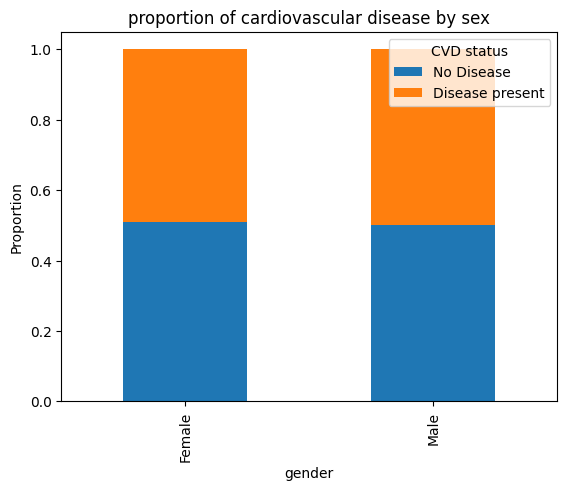

In [14]:
#Sex distribution by cardiovascular disease status continuation..
#Creating proportion plot using normalized cross-tab
plt.figure(figsize=(8,4))
prop_dt = pd.crosstab(data1['gender'], data1['cardio'], normalize='index')
prop_dt.index =['Female', 'Male']
prop_dt.columns = ['No Disease', 'Disease present']
prop_dt.plot(kind='bar', stacked=True)
plt.title('proportion of cardiovascular disease by sex')
plt.xlabel('gender')
plt.ylabel('Proportion')
plt.legend(title='CVD status')
plt.savefig('sex_cvd_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

**Key Insights:**

**1. Similar Proportions Across Sexes**

Both females and males show almost equal proportions of:

~50% with CVD

~50% without CVD

This suggests that sex is not strongly associated with cardiovascular disease in this dataset, at least proportionally.

**2. More Accurate Than Count Plot**

Unlike the count plot (where more females appeared to have CVD simply because there were more females overall), this plot normalizes for group size, giving a more accurate picture of CVD risk across sexes.

**Conclusion:**

The proportion of individuals with cardiovascular disease is roughly the same for males and females.

Sex does not appear to be a strong differentiator of cardiovascular disease prevalence, based on this proportion-based analysis.

In [15]:
#Summary functions
data1.describe()

,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,164.372861,74.100688,126.434924,81.263925,0.087662,0.053134,0.803548,52.823635,27.510513
std,8.176756,14.288862,15.961685,9.143985,0.282805,0.224302,0.397317,6.769909,6.026497
min,55.000000,11.000000,90.000000,60.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,48.000000,23.875115
50%,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,53.000000,26.346494
75%,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,58.000000,30.116213
max,250.000000,200.000000,180.000000,120.000000,1.000000,1.000000,1.000000,64.000000,298.666667


In [16]:
data1.select_dtypes(include=['object','category']).describe()

,gender,cholesterol,cardio,bp_category
count,68205,68205,68205,68205
unique,2,3,2,4
top,Female,Normal,No Disease,Hypertension Stage 1
freq,44427,51222,34533,39750


**3. HYPOTHESIS FORMULATION**

**Research question**	Is there a statistically significant association between cholesterol level and the presence of cardiovascular disease in patients?

**Reaseach Summary:**

This research is conducted to explore the relationship between cholesterol levels and the presence of cardiovascular disease. Given the well-established role of cholesterol as a potential risk factor in heart health, understanding whether there is a statistically significant association between these two variables can provide valuable insights for clinical screening and preventive care. By applying inferential statistical methods, particularly the Chi-Square test of independence, this study aims to determine whether cholesterol level distributions differ meaningfully between individuals with and without cardiovascular disease. The findings may help inform public health strategies and underscore the importance of cholesterol management in reducing cardiovascular risk.


**Null Hypothesis (H₀):** Cholesterol level and cardiovascular disease status are independent (no association).

**Alternative Hypothesis (H₁):** There is an association between cholesterol level and cardiovascular disease.


In [17]:
data1['cholesterol'].dtype

CategoricalDtype(categories=['Normal', 'Above Normal', 'Well Above Normal'], ordered=False, categories_dtype=object)

In [18]:
#1. Categorising into those with and without disease and their cardiovascular disease status
present = data1.loc[data1['cardio'] == 'Disease present', ['cholesterol', 'cardio']]
present

,cholesterol,cardio
1,Well Above Normal,Disease present
2,Well Above Normal,Disease present
3,Normal,Disease present
7,Well Above Normal,Disease present
15,Normal,Disease present
...,...,...
68198,Normal,Disease present
68199,Normal,Disease present
68201,Above Normal,Disease present
68202,Well Above Normal,Disease present


In [19]:
#2. Categorising into those with and without disease and their cardiovascular disease status
Not_present = data1.loc[data1['cardio'] == 'No Disease', ['cholesterol', 'cardio']]
Not_present

,cholesterol,cardio
0,Normal,No Disease
4,Normal,No Disease
5,Above Normal,No Disease
6,Well Above Normal,No Disease
8,Normal,No Disease
...,...,...
68192,Normal,No Disease
68193,Normal,No Disease
68196,Above Normal,No Disease
68200,Normal,No Disease


## Chosen Test: Chi-Square Test of Independence

### Reasons for Choosing the Chi-Square Test

#### Nature of the Variables

**Cholesterol is a categorical (ordinal) variable with three levels:**

1 = Normal

2 = Above Normal

3 = Well Above Normal

**Cardio is a binary nominal variable:**

0 = No cardiovascular disease

1 = Cardiovascular disease present

The Chi-Square test is specifically designed to evaluate relationships between two categorical variables.

**Test Objective Matches the Research Question**

The goal is to determine whether cholesterol levels and cardiovascular disease are statistically associated.

The Chi-Square Test of Independence is ideal for assessing such non-directional associations (i.e., whether a relationship exists, not the direction or size of the effect).

**No Parametric Assumptions Required**

Unlike t-tests or ANOVA, the Chi-Square test does not assume normality or homogeneity of variance.

This makes it suitable when working with categorical data, where such assumptions do not apply or cannot be met.

**Appropriate for Large Sample Sizes**

The dataset includes thousands of observations, providing enough data for a robust Chi-Square test.

A critical assumption of the Chi-Square test is that expected cell frequencies should generally be ≥ 5, which is satisfied in this dataset based on the expected frequency table.

**Simplicity and Interpretability**

The Chi-Square test is widely understood and interpretable.

It provides a clear outcome in the form of a Chi-Square statistic and p-value, which helps determine if the observed relationship between cholesterol levels and cardiovascular disease is likely due to chance.

In [20]:
from scipy.stats import chi2_contingency

In [21]:
#Contigency table to organize data by combinations
chol_cardio = pd.crosstab(data1['cholesterol'], data1['cardio'])
chol_cardio

cardio,No Disease,Disease present
cholesterol,,
Normal,28953,22269
Above Normal,3721,5470
Well Above Normal,1859,5933


In [22]:
#Chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(chol_cardio)

#Results
print('chi-Square Statistic', chi2_stat)
print('Degrees of freedom', dof)
print('p-value', p_val)

chi-Square Statistic 3324.753273153776
Degrees of freedom 2
p-value 0.0


### Chi-Square Test of Independence Results

**Chi-Square Statistic:** 3324.75

**Degrees of Freedom:** 2

**p-value:** < 0.001

**Statistical Interpretation:**

The Chi-Square test yielded a p-value well below the conventional **significance threshold of 0.05**. Therefore, we **reject the null hypothesis (H₀)**, which posited no association between cholesterol level and cardiovascular disease status.

**Practical Implications:**

The results provide strong statistical evidence of a significant relationship between cholesterol levels and the presence of cardiovascular disease. Specifically, cholesterol levels and cardiovascular disease status are not independent of each other.

In applied terms, this suggests that individuals with elevated or high cholesterol levels are considerably more likely to exhibit signs of cardiovascular disease compared to those with normal cholesterol levels. This finding highlights the clinical relevance of monitoring and managing cholesterol as a potential risk factor in cardiovascular health.

In [23]:
data1.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'smoke',
       'alco', 'active', 'cardio', 'age_years', 'bmi', 'bp_category'],
      dtype='object')

In [24]:
## Predicting CardiVascular disease status
data2 = data1.loc[:, ['age_years','cholesterol', 'gender','ap_hi','ap_lo', 'bmi','smoke','alco','active','cardio']]

In [25]:
data2

,age_years,cholesterol,gender,ap_hi,ap_lo,bmi,smoke,alco,active,cardio
0,50,Normal,Male,110,80,21.967120,0,0,1,No Disease
1,55,Well Above Normal,Female,140,90,34.927679,0,0,1,Disease present
2,51,Well Above Normal,Female,130,70,23.507805,0,0,0,Disease present
3,48,Normal,Male,150,100,28.710479,0,0,1,Disease present
4,47,Normal,Female,100,60,23.011177,0,0,0,No Disease
...,...,...,...,...,...,...,...,...,...,...
68200,52,Normal,Male,120,80,26.927438,1,0,1,No Disease
68201,61,Above Normal,Female,140,90,50.472681,0,0,1,Disease present
68202,52,Well Above Normal,Male,180,90,31.353579,0,1,0,Disease present
68203,61,Normal,Female,135,80,27.099251,0,0,0,Disease present


In [26]:
print(data2.smoke.unique())
print(data2.alco.unique())
print(data2.active.unique())

[0 1]
[0 1]
[1 0]


In [27]:
data2.isnull().sum()

age_years      0
cholesterol    0
gender         0
ap_hi          0
ap_lo          0
bmi            0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [28]:
data2.cardio

0             No Disease
1        Disease present
2        Disease present
3        Disease present
4             No Disease
              ...       
68200         No Disease
68201    Disease present
68202    Disease present
68203    Disease present
68204         No Disease
Name: cardio, Length: 68205, dtype: category
Categories (2, object): ['No Disease', 'Disease present']

In [29]:
#Encoding categorical variables through mapping
mapping_dict1 = {
    'gender':{'Male':2,'Female':1},
    'cholesterol':{'Normal':1,'Above Normal':2,'Well Above Normal':3},
    'cardio':{'No Disease':0,'Disease present':1}
}

for col, mapping in mapping_dict1.items():
    data2[col] = data2[col].map(mapping)

In [30]:
#Separating features and labels from the dataset
X = data2.loc[:,['age_years','cholesterol', 'gender','ap_hi','ap_lo', 'bmi','smoke','alco','active']]
y = data2.cardio

In [31]:
#Splitting data into training and validation based on an random generator 
from sklearn.model_selection import train_test_split
train_X, Val_X, train_y, val_y = train_test_split(X,y, test_size=0.2, random_state=0)

#Define the model
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression(max_iter=1000)
Model.fit(train_X, train_y)

LogisticRegression(max_iter=1000)

In [32]:
#predictions
y_pred = Model.predict(Val_X)
comparison = {
    'Actual':val_y,
    'predicted': y_pred
}

output = pd.DataFrame(comparison)
output

,Actual,predicted
26425,0,0
58270,0,0
59642,1,0
26191,1,1
26354,1,1
...,...,...
27444,1,0
38729,0,1
7393,0,0
15473,1,1


In [33]:
#Evaluation
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy', accuracy_score(val_y, y_pred))
print(classification_report(val_y, y_pred))

Accuracy 0.7283923466021552
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6937
           1       0.76      0.66      0.71      6704

    accuracy                           0.73     13641
   macro avg       0.73      0.73      0.73     13641
weighted avg       0.73      0.73      0.73     13641

